In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


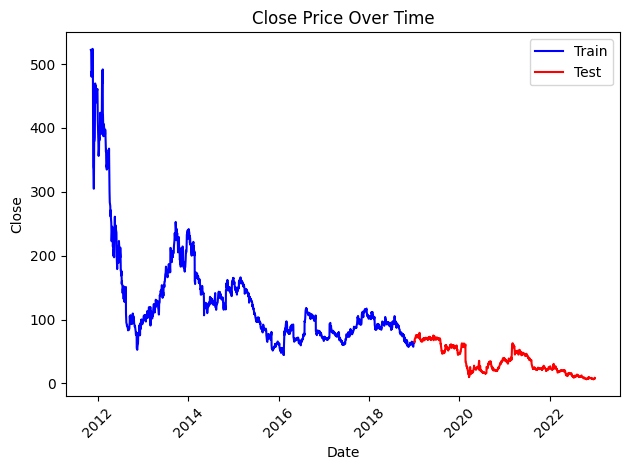

In [2]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('GRPN',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 0.6534052084156463 Average Fitness = 0.4414008125333185
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 0.6534052084156463 Average Fitness = 0.43852600863817814
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 0.8124083165370349 Average Fitness = 0.4985351757189149
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 0.8124083165370349 Average Fitness = 0.5157629570499755
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 0.8124083165370349 Average Fitness = 0.5422025671593984
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 0.8299002933769876 Average Fitness = 0.571467463478383
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 0.8299002933769876 Average Fitness = 0.5496673677532206
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 0.8299002933769876 Average Fitness = 0.5512329407456267
GENERATION 7 END
GENERATION 8 START


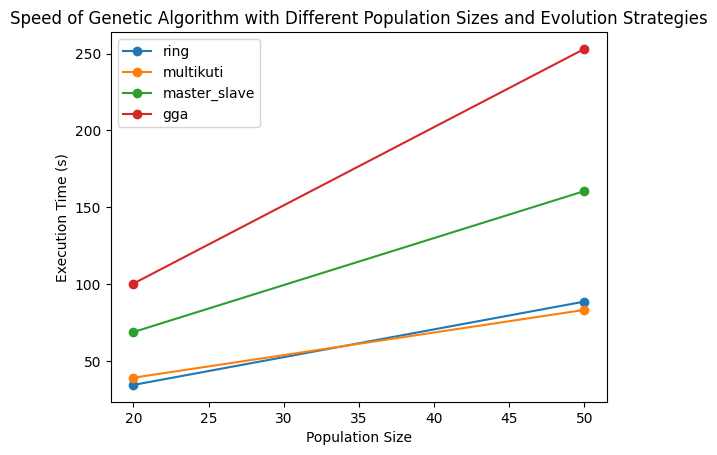

In [4]:
import matplotlib.pyplot as plt

pop_size = [20, 50, 200]
evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]

fitness_values = {strategy: {size: [] for size in pop_size} for strategy in evolve_strategy}
speed_values = {strategy: {size: [] for size in pop_size} for strategy in evolve_strategy}

for strategy in evolve_strategy:
    for size in pop_size:
        for j in range(5):
            start = time.time()
            ga = IslandGGA(data=data.train_data, num_islands=8, m_iter=25, num_iter=20, pSize=size,
                           r_cross=0.6, r_mut=0.1, strategies=data.strategies, evolve_strategy=strategy)
            ga.evolve()
            end = time.time()
            processing_time = end - start
            speed_values[strategy][size].append(processing_time)
            fitness_values[strategy][size].append(ga.globalBest.fitness_value)

# Plot the speed of the algorithm against the population size for each evolution strategy


for strategy in evolve_strategy:
    if strategy == "gga":
        l = "Previous Approach"
    else:
        l = strategy.capitalize()
    plt.plot(pop_size, [sum(speed_values[strategy][size]) / len(speed_values[strategy][size]) for size in pop_size], 'o-', label=l)

plt.xlabel('Population Size')
plt.ylabel('Execution Time (s)')
plt.title('Speed of Genetic Algorithm with Different Population Sizes and Evolution Strategies')
plt.legend()
plt.show()


